In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv("../toydata/titanic.csv")
print(f"{df.shape}")
df.head(1)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [3]:
def histogram_summary(histogram, col_name):

    _ = histogram
    _ = pd.DataFrame({"greater_or_eq": _[1][:-1], "less_than": _[1][1:], "count": _[0]})
    _["Distribution %"] = (_["count"] / _["count"].sum() * 100).round(2)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    x_ticks = [f"[{_.greater_or_eq[i]:.2f}-{_.less_than[i]:.2f})" for i in _.index]

    ax[0].bar(_.index, _["count"])
    ax[0].set_xticks(_.index)
    ax[0].set_xticklabels(x_ticks, rotation=45)
    ax[0].set_xlabel(col_name)
    ax[0].set_ylabel("Count")
    ax[0].set_title(f"Histogram of {col_name}")

    ax[1].bar(_.index, _["Distribution %"])
    ax[1].set_xticks(_.index)
    ax[1].set_xticklabels(x_ticks, rotation=45)
    ax[1].set_xlabel(col_name)
    ax[1].set_ylabel("Distribution %")
    ax[1].set_title(f"Histogram of {col_name} %")

    plt.show()
    return _

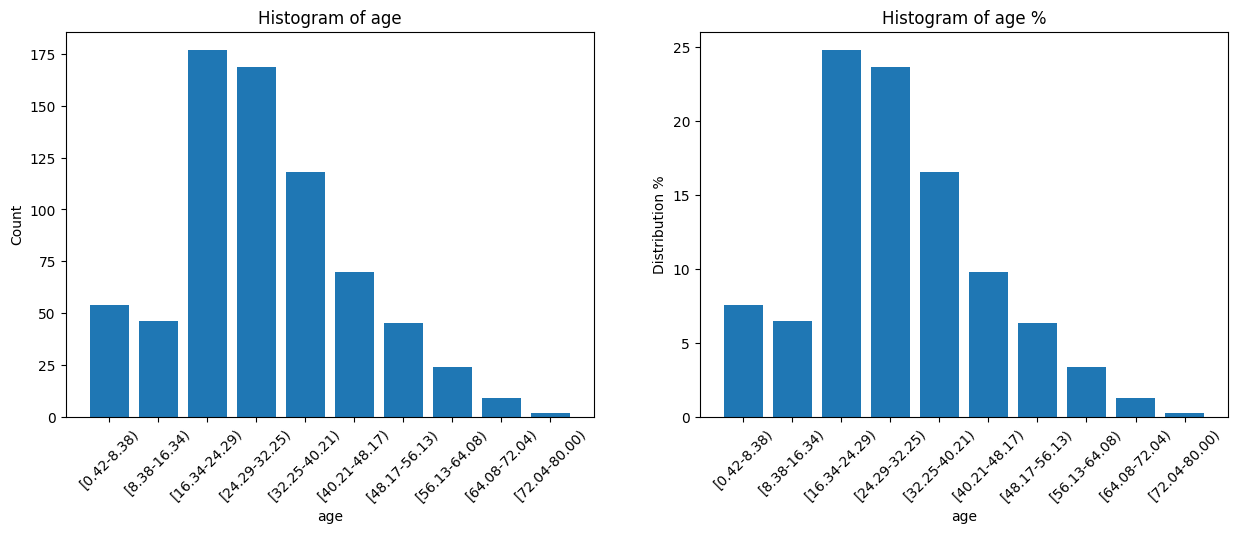

,greater_or_eq,less_than,count,Distribution %
0,0.420,8.378,54,7.56
1,8.378,16.336,46,6.44
2,16.336,24.294,177,24.79
3,24.294,32.252,169,23.67
4,32.252,40.210,118,16.53
5,40.210,48.168,70,9.80
6,48.168,56.126,45,6.30
7,56.126,64.084,24,3.36
8,64.084,72.042,9,1.26
9,72.042,80.000,2,0.28


In [5]:
bins = np.histogram(df["age"].dropna(), bins=10)
histogram_summary(bins, "age")